In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.xls',header=None,usecols=[0,1,2])
df.columns = ['class label','alcohol','malic acid']

In [3]:
df.head()

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


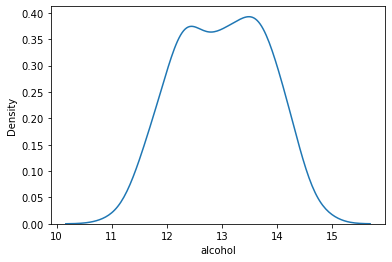

In [4]:
sns.kdeplot(df['alcohol'])
plt.show()

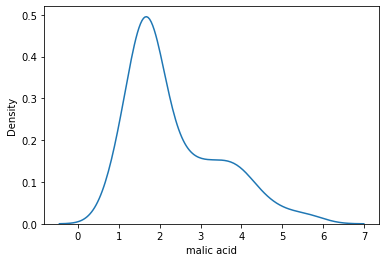

In [5]:
sns.kdeplot(df['malic acid'])
plt.show()

C:\Users\NABA KUMAR ROUT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


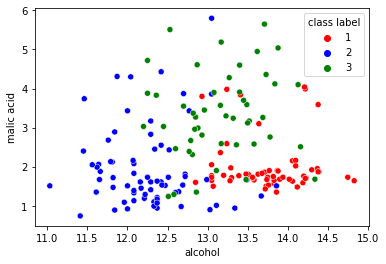

In [6]:
cl_df = {1:'red',3:'green',2:'blue'}
sns.scatterplot(df['alcohol'],df['malic acid'],hue=df['class label'],palette=cl_df)
plt.show()

In [7]:
x = df.drop('class label',axis=1)
y = df['class label']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
X_train

,alcohol,malic acid
161,13.69,3.26
92,12.69,1.53
94,11.62,1.99
174,13.40,3.91
24,13.50,1.81
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [10]:
X_test

,alcohol,malic acid
54,13.74,1.67
151,12.79,2.67
63,12.37,1.13
55,13.56,1.73
123,13.05,5.80
121,11.56,2.05
7,14.06,2.15
160,12.36,3.83
106,12.25,1.73
90,12.08,1.83


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [12]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,alcohol,malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


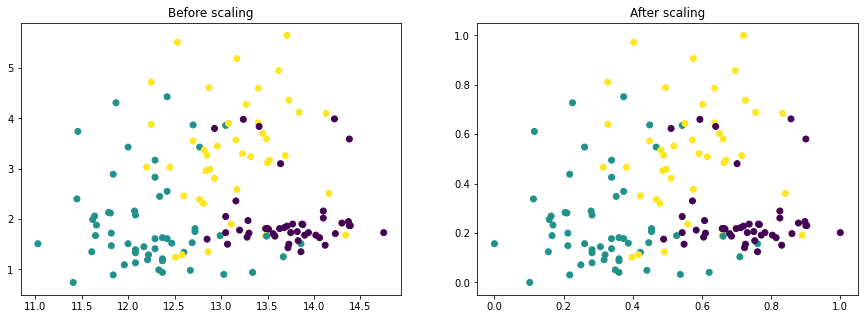

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.scatter(X_train['alcohol'],X_train['malic acid'],c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic acid'],c=y_train)
ax2.set_title('After scaling')
plt.show()

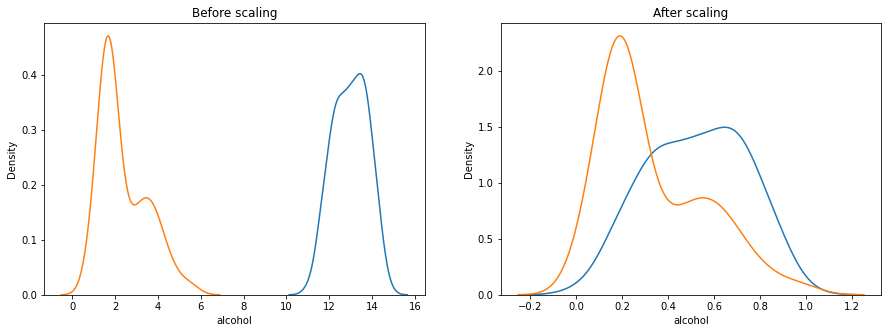

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.kdeplot(X_train['alcohol'],ax=ax1)
sns.kdeplot(X_train['malic acid'],ax=ax1)
ax1.set_title('Before scaling')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['malic acid'],ax=ax2)
ax2.set_title('After scaling')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr.predict(x_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print('Actual ',accuracy_score(y_test,y_pred))
print('Scaled ',accuracy_score(y_test,y_pred_scaled))

Actual  0.7222222222222222
Scaled  0.4444444444444444


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
lr = DecisionTreeClassifier()
lr_scaled = DecisionTreeClassifier()

In [26]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr.predict(x_test_scaled)

In [28]:
print('Actual ',accuracy_score(y_test,y_pred))
print('Scaled ',accuracy_score(y_test,y_pred_scaled))

Actual  0.8055555555555556
Scaled  0.4444444444444444
